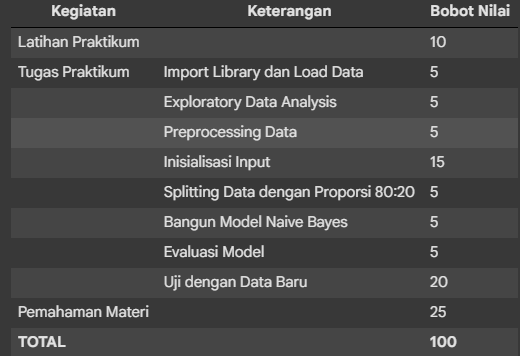


1. Import Library dan Load Data

a. Import semua library yang dibutuhkan.

b. Muat dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

In [2]:
df= pd.read_csv('MODUL 1_TUGAS.csv')

2. Exploratory Data Analysis

a. Tampilkan 5 data teratas dan 5 data terbawah dari dataset.

b. Tampilkan ringkasan statistik dataset, termasuk mean, median, standar deviasi, nilai minimum, nilai maksimum, dan kuartil.

c. Visualisasikan distribusi label dengan grafik.

In [3]:
df.head()

,NIM,Nama,IPK,Kehadiran_Persen,Tugas_Persen,Status
0,2022IF001,Irwan Mahardika,3.29,88.0,90.0,Lulus
1,2022IF002,NaN,2.71,56.0,30.0,Tidak Lulus
2,2022IF003,Qisya Wardani,3.59,94.0,70.0,Lulus
3,2022IF004,Cahya Pasaribu,2.32,50.0,30.0,Tidak Lulus
4,2022IF005,Hadi Maulana,3.22,75.0,70.0,Lulus


In [4]:
df.tail()

,NIM,Nama,IPK,Kehadiran_Persen,Tugas_Persen,Status
245,2022IF246,Nama246,3.04,91.0,NaN,Lulus
246,2022IF247,Nama247,3.50,76.0,62.0,Lulus
247,2022IF248,Nama248,3.17,82.0,57.0,Tidak Lulus
248,2022IF249,Nama249,3.21,94.0,73.0,Lulus
249,2022IF250,Nama250,3.78,86.0,66.0,Lulus


In [5]:
df.describe()

,IPK,Kehadiran_Persen,Tugas_Persen
count,237.000000,245.000000,235.000000
mean,2.918903,79.032653,70.225532
std,0.526897,15.863886,21.867027
min,1.440000,31.000000,0.000000
25%,2.680000,75.000000,63.000000
50%,3.040000,81.000000,71.000000
75%,3.260000,91.000000,80.000000
max,4.000000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NIM               250 non-null    object 
 1   Nama              235 non-null    object 
 2   IPK               237 non-null    float64
 3   Kehadiran_Persen  245 non-null    float64
 4   Tugas_Persen      235 non-null    float64
 5   Status            250 non-null    object 
dtypes: float64(3), object(3)
memory usage: 11.8+ KB



--- Distribusi Label Status Kelulusan ---


C:\Users\Faliq\AppData\Local\Temp\ipykernel_14356\2142671425.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, palette=['skyblue', 'salmon'])


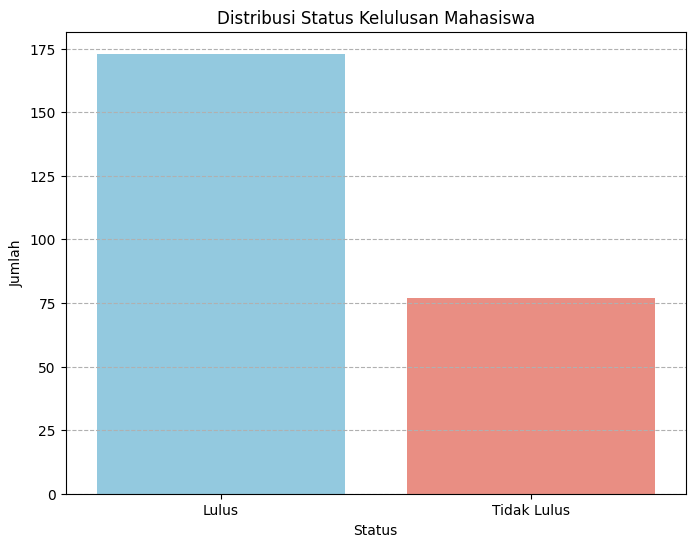

In [7]:
print("\n--- Distribusi Label Status Kelulusan ---")
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df, palette=['skyblue', 'salmon'])
plt.title('Distribusi Status Kelulusan Mahasiswa')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--')
plt.show()

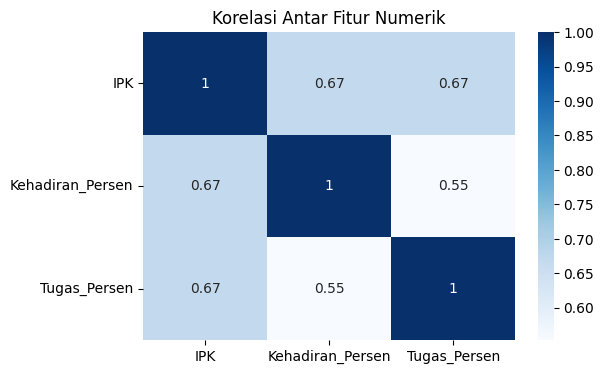

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Korelasi Antar Fitur Numerik")
plt.show()


3. Preprocessing Data

Atasi missing value dengan ketentuan:

a. Isi nilai kosong pada kolom ‘IPK’ dan ‘Kehadiran_Persen’ dengan mean.

b. Isi nilai kosong pada kolom ‘Tugas_Persen’ dengan median.

c. Isi nilai kosong pada kolom ‘Nama’ dengan ‘Nama_Tidak_Diketahui’.

In [9]:
df.isnull().sum()

NIM                  0
Nama                15
IPK                 13
Kehadiran_Persen     5
Tugas_Persen        15
Status               0
dtype: int64

In [10]:
df['IPK'].fillna(df['IPK'].mean(), inplace=True)
df['Kehadiran_Persen'].fillna(df['Kehadiran_Persen'].mean(), inplace=True)

C:\Users\Faliq\AppData\Local\Temp\ipykernel_14356\2415108110.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IPK'].fillna(df['IPK'].mean(), inplace=True)
C:\Users\Faliq\AppData\Local\Temp\ipykernel_14356\2415108110.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [11]:
df['Tugas_Persen'].fillna(df['Tugas_Persen'].median(), inplace=True)

C:\Users\Faliq\AppData\Local\Temp\ipykernel_14356\1252353958.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tugas_Persen'].fillna(df['Tugas_Persen'].median(), inplace=True)


In [12]:
df['Nama'].fillna('Nama_Tidak_Diketahui', inplace=True)

C:\Users\Faliq\AppData\Local\Temp\ipykernel_14356\384241804.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Nama'].fillna('Nama_Tidak_Diketahui', inplace=True)


In [13]:
df.isnull().sum()

NIM                 0
Nama                0
IPK                 0
Kehadiran_Persen    0
Tugas_Persen        0
Status              0
dtype: int64

4. Inisialisasi Input

Pisahkan data menjadi fitur dan target.

In [14]:
X = df[['IPK', 'Kehadiran_Persen', 'Tugas_Persen']]
y = df['Status']

5. Splitting Data dengan Proporsi 80:20

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

C:\Users\Faliq\AppData\Local\Temp\ipykernel_14356\4277782584.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Set1", ax=axes[0])
C:\Users\Faliq\AppData\Local\Temp\ipykernel_14356\4277782584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_bal, palette="Set2", ax=axes[1])


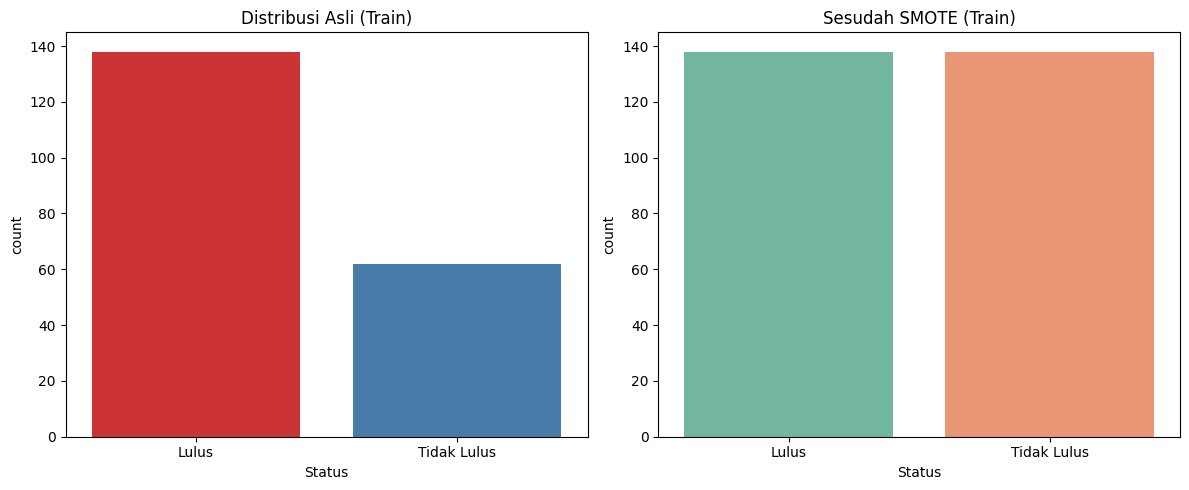

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=y_train, palette="Set1", ax=axes[0])
axes[0].set_title("Distribusi Asli (Train)")
sns.countplot(x=y_train_bal, palette="Set2", ax=axes[1])
axes[1].set_title("Sesudah SMOTE (Train)")
plt.tight_layout()
plt.show()

6. Bangun Model Naive Bayes

In [19]:
model = GaussianNB()
model.fit(X_train_bal, y_train_bal)

GaussianNB()

7. Evaluasi Model dengan Ketentuan Berikut:

a. Tampilkan classification report beserta keterangan labelnya.

b. Akurasi minimal 85%.

In [ ]:
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label="Lulus")

print("=== Evaluasi Model ===")
print(f"Akurasi     : {acc*100:.2f}%")
print(f"F1-Score    : {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

=== Evaluasi Model ===
Akurasi     : 94.00%
F1-Score    : 0.96

Classification Report:
              precision    recall  f1-score   support

       Lulus       0.92      1.00      0.96        35
 Tidak Lulus       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.96      0.90      0.92        50
weighted avg       0.94      0.94      0.94        50

Confusion Matrix:
 [[35  0]
 [ 3 12]]


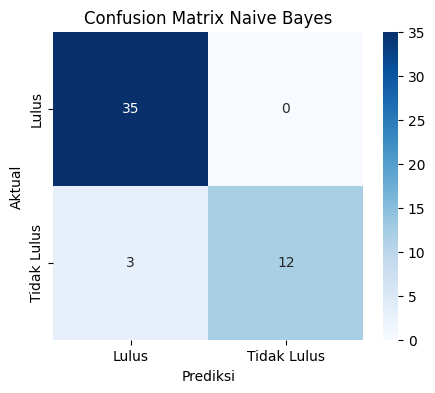

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Naive Bayes")
plt.show()

In [22]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation (5-Fold):")
print("Akurasi per fold:", np.round(cv_scores, 3))
print("Rata-rata akurasi CV:", round(cv_scores.mean()*100, 2), "%\n")

Cross-Validation (5-Fold):
Akurasi per fold: [1.   1.   0.98 0.9  0.9 ]
Rata-rata akurasi CV: 95.6 %



8. Uji dengan Data Baru:

a. IPK 3.2, Kehadiran_Persen 85%, Tugas_Persen 20%.

b. IPK 2.1, Kehadiran_Persen 60%, Tugas_Persen 50%.

c. IPK 3.8, Kehadiran_Persen 95%, Tugas_Persen 90%.

In [23]:
uji = pd.DataFrame({
    'IPK': [3.2, 2.1, 3.8],
    'Kehadiran_Persen': [85, 60, 95],
    'Tugas_Persen': [20, 50, 90]
})

uji_scaled = scaler.transform(uji)
hasil = model.predict(uji_scaled)

print("\nHasil Prediksi Data Baru:")
for i, h in enumerate(hasil, start=1):
    print(f"{i}. {h}")


Hasil Prediksi Data Baru:
1. Tidak Lulus
2. Tidak Lulus
3. Lulus


In [ ]:
#uji_csv = pd.read_csv("Data_Uji_Baru.csv")

#uji_csv_scaled = scaler.transform(uji_csv[['IPK', 'Kehadiran_Persen', 'Tugas_Persen']])

#hasil_csv = model.predict(uji_csv_scaled)

#uji_csv['Prediksi'] = hasil_csv

#uji_csv.to_csv("Data_Uji_Baru_Hasil.csv", index=False)